In [1]:
# Copyright 2022 Benjamin Meyjohann

import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import importlib
import skimage
import json
import wandb
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug import parameters as iap

# Following lines were sometimes needed to be able to train on an Nvidia RTX 2060 super.
#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#sess = tf.Session(config=config)

#config = tf.ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.9
#tf.keras.backend.set_session(tf.Session(config=config));

# Right now, this line does the trick.
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

# See if GPU has been detected.
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

# Root directory of the project
ROOT_DIR = os.path.abspath("")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
importlib.reload(modellib)
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

c:\ProgramData\Miniconda3\envs\test2\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\ProgramData\Miniconda3\envs\test2\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\ProgramData\Miniconda3\envs\test2\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\ProgramData\Miniconda3\envs\test2\lib\site-packages\tensorflow\pyth

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 492004767187874339
]


Using TensorFlow backend.


In [2]:
class IEConfig(Config):
    """
    Configuration for training on the IE dataset.
    Derives from the base Config class and overrides values specific
    to the IE dataset.
    """
    NAME = "InteractiveElements"

    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    CLASSES = ["Menu", "BackButton", "MoreOptions", "FloatingActionButton",
               "NavigationBarItem", "Button", "Checkbox", "RadioButton", "Switch", "Slider", "TextField"]

    # Number of classes (including background)
    NUM_CLASSES = 1 + len(CLASSES)

    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512

    
config = IEConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
CLASSES                        ['Menu', 'BackButton', 'MoreOptions', 'FloatingActionButton', 'NavigationBarItem', 'Button', 'Checkbox', 'RadioButton', 'Switch', 'Slider', 'TextField']
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                24
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS           

In [3]:
class InferenceConfig(IEConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode.
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights.
# Either set a specific path or find last trained weights.
model_path = os.path.join(ROOT_DIR, "mask_rcnn_interactiveelements_0060.h5")
# model_path = model.find_last()

# Load trained weights.
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.
Loading weights from  c:\Data\Mask_RCNN\mask_rcnn_interactiveelements_0060.h5


start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image received
start
image r

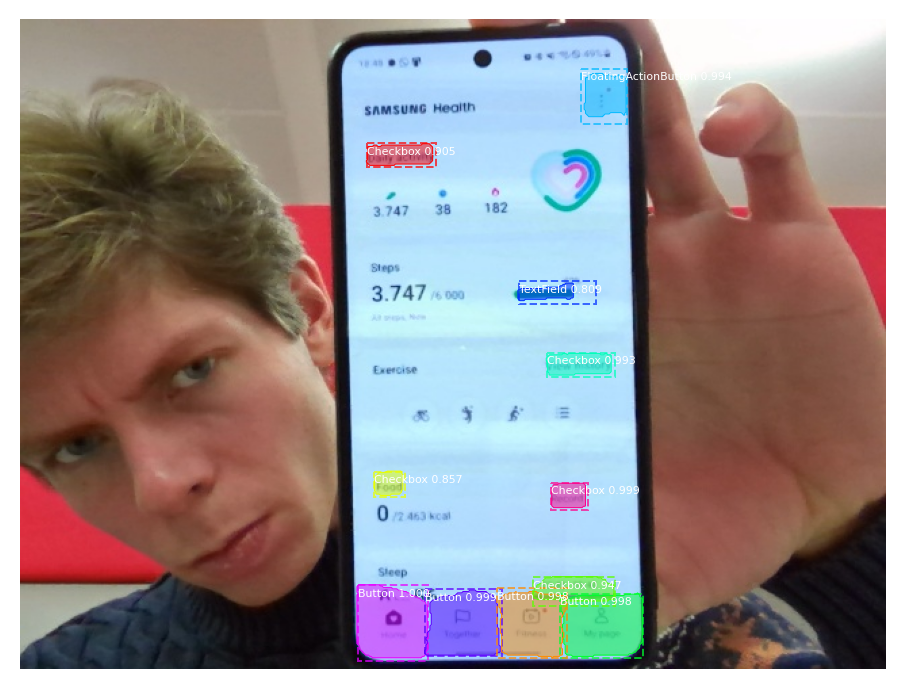

detection done
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
2

In [17]:
# IP adress of device capturing images.
CAMERA_HOST = "localhost"
# Port on which the server for capturing is listening.
CAMERA_PORT = 1300

import socket
import json
import base64
from io import BytesIO
from PIL import Image
from IPython.display import clear_output

def getImageFromServer():
    for i in range(100):
        try:
            client = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
            client.settimeout(1)

            client.connect((CAMERA_HOST, CAMERA_PORT))
            request = {"header": "raw"}
            client.sendall((json.dumps(request) + "\n").encode())
            image_base64 = client.makefile().readline()
            image_bytes = base64.b64decode(image_base64)
            image_file = BytesIO(image_bytes)
            image = Image.open(image_file)
            return image
        except:
            print("Connection refused:", i, "/", 100)
            continue
    return None
    

cv2.namedWindow("Image")

while True:
    image = None
    while True:
        print("start")
        image = getImageFromServer()
        print("image received")
        image = np.array(image)
        im = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        cv2.imshow("Image", im)
        # Finish loop when user presses q.
        if cv2.waitKey(1) & 0xFF != 255:
            break

    if image is not None:
        print("detection starting")
        r = model.detect([image], verbose=0)[0]
        try:
            result = visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                    config.CLASSES, r['scores'], figsize=(16, 16))
            
            result = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
            print("detection done")

            while True:
                cv2.imshow("Image", result)
                # Finish loop when user presses q.
                print(0xFF)
                if cv2.waitKey(1) & 0xFF != 255:
                    break
        except:
            print("Visualization failed.")
            continue

!pip install Flask
from flask import Flask, jsonify

app = Flask(__name__)
@app.route('/')
def detection():
    image = getImageFromServer()
    if image is not None:
        image = np.array(image)

        r = model.detect([image], verbose=0)[0]
        clear_output(wait=True)
        visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                    config.CLASSES, r['scores'], figsize=(16, 16))
        return jsonify(r)
    return jsonify({"Error": "Could not capture image."})

app.run(host="0.0.0.0")